In [102]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce

from sklearn.model_selection import train_test_split

from sklearn import tree

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.utils.extmath import density

from sklearn import metrics
import model
from model import Model
import health_data
from health_data import DepressionHealthData
import imp


#显示所有列
pd.set_option('display.max_columns', None)
#显示所有行
pd.set_option('display.max_rows', None)


In [103]:
dhd = DepressionHealthData()
dhd.prepare_data()
dhd.df.reset_index(drop=True, inplace=True)

Read Health Data
    SEQN  ACD011A  ACD011B  ACD011C  ACD040  ACD110  ALQ101  ALQ110  ALQ120Q  \
0  73557      1.0      NaN      NaN     NaN     NaN     1.0     NaN      1.0   
1  73558      1.0      NaN      NaN     NaN     NaN     1.0     NaN      7.0   
2  73559      1.0      NaN      NaN     NaN     NaN     1.0     NaN      0.0   
3  73560      1.0      NaN      NaN     NaN     NaN     NaN     NaN      NaN   
4  73561      1.0      NaN      NaN     NaN     NaN     1.0     NaN      0.0   

   ALQ120U  ALQ130  ALQ141Q  ALQ141U  ALQ151  ALQ160  BPQ020  BPQ030  BPD035  \
0      3.0     1.0      0.0      NaN     1.0     NaN     1.0     1.0    62.0   
1      1.0     4.0      2.0      1.0     1.0     0.0     1.0     1.0    53.0   
2      NaN     NaN      NaN      NaN     2.0     NaN     1.0     1.0    40.0   
3      NaN     NaN      NaN      NaN     NaN     NaN     NaN     NaN     NaN   
4      NaN     NaN      NaN      NaN     2.0     NaN     1.0     2.0    55.0   

   BPQ040A  BPQ050A  

In [44]:
sum = dhd.get_depression_status(classify=True)
df = dhd.df

Function: get_depression_status Total Time Used: 0.22655892372131348


In [212]:
def detest() -> Model:
   demographics_feature = ["RIAGENDR", "RIDRETH3", "DMQMILIZ", "DMDMARTL", "RIDEXPRG", "DMDHHSIZ", "DMDFMSIZ"]
   blood_pressure = ["BPQ060", "BPQ090D", "BPQ100D"]
   card_health = ["CDQ001"]
   consumer_behavior = ["CBD130"]
   #creatine_kinase = ["CKQ010", "CKQ020", "CKQ040", "CKQ070Q"]
   current_health = ["HSQ571", "HSQ590"]
   dermatology = ["DED031", "DEQ034A", "DEQ034C", "DEQ038G", "DED120"]
   diabetes = ["DIQ010", "DIQ070"]
   diet_behavior_nutrition = ["DBQ010", "DBD055", "DBQ700", "DBQ197", "DBQ301", "DBQ330", "DBQ360", "DBD381", "DBQ390", "CBQ550", "CBQ585", "DBD895"]
   disablity = ["DLQ010", "DLQ020", "DLQ040", "DLQ050", "DLQ060", "DLQ080"]
   drug_use = ["DUQ200", "DUQ219", "DUQ240", "DUQ272", "DUQ320", "DUQ352", "DUQ370", "DUQ410", "DUQ430"]
   food = ["FSD032B", "FSD071", "FSD102", "FSD032D", "FSD146", "FSDHH", "FSD151", "FSQ165", "FSQ162", "FSD650ZC"]
   health_insurance = ["HIQ210"]
   home = ["HOD050", "HOQ065"]
   hospital_utilization = ["HUQ051", "HUQ030", "HUQ071", "HUQ090"]
   income = ["INQ020", "INQ012", "INQ030", "INQ060", "INQ080", "INQ090", "INQ132", "INQ140", "INQ150", "IND235"]
   # kidney = ["KIQ022", "KIQ026", "KIQ005", "KIQ005"]
   #top25 = ["RXDCOUNT", "PFQ063B", "SLQ050", "HSD010", "SLD010H", "WHQ150", "WHD010", "PAQ710", "INDFMMPI", "CDQ010", "DMDHRAGE", "INDFMPIR", "CBD070", "CBD110", "SMD030", "SXD031", "IND235", "CBD120", "ALQ130"]
   #top50 = ["ALQ120Q", "WHD050", "DMDEDUC2", "DMDEDUC3", "WHD110", "DLQ050", "MCQ300C", "HUQ051", "RHD190", "CBQ580", "RIDAGEYR", "SMQ040", "OHQ680", "HOD050", "RHQ560Q", "WHD020", "HUQ010", "PAD680", "MCQ092", "DIQ070", "PFQ063A"]
   #top75 = ["DBD895", "PFQ063D", "OHQ870", "SXD101", "SXD171", "OHQ030", "DMDHRGND", "RHQ420", "PAD675", "DED031", "DED120", "DMDHRMAR", "BPD035", "BPQ050A", "BPQ050A", "PFQ061S", "OCD270", "OHQ875"]
   #top100 = ["OCQ180", "DBD900", "CBQ585", "FSD032B", "DMDHSEDU", "RHQ060", "MCQ370A", "DBQ235C", "OHQ033", "SXD171", "MCQ365C", "CDQ008", "DMDHHSZB", "SXQ610", "MCQ380", "PAQ715", "RHQ160", "INDFMIN2", "DBQ235B"]

   final_features = [
      *demographics_feature, *blood_pressure, *card_health, *consumer_behavior, *current_health, 
      *dermatology, *diabetes, *diet_behavior_nutrition, *disablity, *drug_use, *food, 
      *health_insurance, *home, *hospital_utilization, *income]
   # final_features = [*diet_behavior_nutrition, *disablity, *drug_use, *food, *home]
   # pre_features = [*top25]
   # final_not_one_hot_features = [x[1:] for x in pre_features if x[0] == '@']
   # final_one_hot_features = [x for x in pre_features if x[0] != '@']
   # final_features = [*final_not_one_hot_features, *final_one_hot_features]
   detest = df[final_features].copy()
   detest = pd.get_dummies(detest, columns=final_features)
   #detest = detest.fillna(0)
   detest.insert(0, 'SUM', sum)
   from model import Model
   m = Model(detest)
   m.init_data_set()
   return m

Function: init_data_set Total Time Used: 0.053549766540527344


In [45]:
# def range_encoding(df: DataFrame, encode_name: str, start: float, end: float, step: float, special: dict):
#   for interval in range(start, end, step):
#     df.insert(df.columns.get_loc(encode_name), f"{encode_name}_{interval}_{interval + step}", df[encode_name].apply(lambda x: 1 if x >= interval and x < interval + step else 0))
#   for sp in special:
#     df.insert(df.columns.get_loc(encode_name), f"{encode_name}_{sp}", df[encode_name].apply(lambda x: 1 if str(x).lower() == str(sp).lower() or (str(x).lower() != str(np.NaN).lower() and str(sp).lower() != str(np.NaN).lower() and str(int(x)) == str(int(sp))) else 0))
#   df.drop([encode_name], inplace=True, axis=1)

def range_encoding(df: DataFrame, encode_name: str, start: float, end: float, step: float, special: list):
  # for interval in range(start, end, step):
  #   df.insert(df.columns.get_loc(encode_name), f"{encode_name}_{interval}_{interval + step}", df[encode_name].apply(lambda x: 1 if x >= interval and x < interval + step else 0))
  for sp in special:
    df.insert(df.columns.get_loc(encode_name), f"{encode_name}_{sp}", df[encode_name].apply(lambda x: 1 if str(x).lower() == str(sp).lower() or (str(x).lower() != str(np.NaN).lower() and str(sp).lower() != str(np.NaN).lower() and str(int(x)) == str(int(sp))) else 0))
  df.insert(df.columns.get_loc(encode_name), f"{encode_name}_RE", df[encode_name].apply(lambda x: 0 if any(str(x).lower() in str(sp).lower() or (not str(x).lower() in str(np.NaN).lower() and not str(sp).lower() in str(np.NaN).lower() and str(int(x)) in str(int(sp))) for sp in special) else x))
  df.drop([encode_name], inplace=True, axis=1)


In [104]:
top25 = ["RXDCOUNT", "PFQ063B", "SLQ050", "HSD010", "SLD010H", "WTINT2YR", "WHQ150", "WHD010", "PAQ710", "INDFMMPI", "CDQ010", "MDHRAGE", "INDFMPIR", "CBD070", "CBD110", "SMD030", "SXD031", "IND235", "CBD120", "ALQ130"]
# top25onehot = ["PFQ063B", "SLQ050", "HSD010", "SXQ709", "IND235", "ALQ101", "DMDEDUC2", "DMDEDUC3", "DLQ050", "MCQ300C", "HUQ051", "CBQ580", "SMQ040", "HUQ010", "MCQ092", "PFQ063A", "PFQ063D"]
top25onehot = ["PFQ063B", "SLQ050", "HSD010", "SXQ709", "IND235", "ALQ101", "DLQ050", "MCQ300C", "HUQ051", "CBQ580", "SMQ040", "HUQ010", "MCQ092", "PFQ063A", "PFQ063D"]
NaNDict = ["NaN"]
RefusedIDK1 = ["7", "9"]
RefusedIDK2 = ["77", "99"]
RefusedIDK3 = ["777", "999"]
RefusedIDK4 = ["7777", "9999"]
RefusedIDK5 = ["77777", "99999"]
RefusedIDK6 = ["777777", "999999"]
RXDCOUNT = ["RXDCOUNT", 1, 23, 2, NaNDict]
SLD010H = ["SLD010H", 2, 12, 2, [*NaNDict, *RefusedIDK2]]
WHD010 = ["WHD010", 48, 81, 5, [*NaNDict, *RefusedIDK4]]
df[df["PAQ710"] == 8] = 0
PAQ710 = ["PAQ710", 0, 5, 1, [*NaNDict, *RefusedIDK2]]
INDFMMPI = ["INDFMMPI", 0, 5, 1, [*NaNDict]]
CBD110 = ["CBD110", 0, 2000, 200, [*NaNDict, *RefusedIDK6]]
SMD030 = ["SMD030", 0, 64, 10, [*NaNDict, *RefusedIDK3, "80"]]
SXD031 = ["SXD031", 9, 60, 5, [*NaNDict, *RefusedIDK2]]
CBD070 = ["CBD070", 0, 4285, 500, [*NaNDict, *RefusedIDK6]]
CBD090 = ["CBD090", 0, 1542, 200, [*NaNDict, *RefusedIDK6]]
ALQ130 = ["ALQ130", 1, 25, 5, [*NaNDict, *RefusedIDK3]]
ALQ120Q = ["ALQ120Q", 0, 365, 30, [*NaNDict, *RefusedIDK3]]
WHD050 = ["WHD050", 75, 559, 20, [*NaNDict, *RefusedIDK4]]
RHD190 = ["RHD190", 14, 45, 5, [*NaNDict, *RefusedIDK3]]
RIDAGEYR = ["RIDAGEYR", 0, 80, 5, [*NaNDict]]
HOD050 = ["HOD050", 1, 13, 2, [*NaNDict, *RefusedIDK3]]
WHD020 = ["WHD020", 75, 493, 20, [*NaNDict, *RefusedIDK4]]
DBD895 = ["DBD895", 1, 27, 3, [*NaNDict, *RefusedIDK4, "5555"]]
OHQ870 = ["OHQ870", 0, 7, 2, [*NaNDict, *RefusedIDK2]]


# top25_range_encoding = [RXDCOUNT, SLD010H, WHD010, PAQ710, INDFMMPI, CBD110, SMD030, SXD031, CBD070, CBD090, ALQ130, ALQ120Q, WHD050, RIDAGEYR, RHD190, HOD050, WHD020, DBD895, OHQ870]
top25_range_encoding = [SLD010H, WHD010, PAQ710, INDFMMPI, CBD110, SMD030, SXD031, CBD070, CBD090, ALQ130, ALQ120Q, WHD050, RHD190, HOD050, WHD020, DBD895, OHQ870]
top25_range_encoding_columns = [*[col[0] for col in top25_range_encoding], *top25onehot]
df_range_encoding = df[top25_range_encoding_columns].copy()
df_range_encoding = pd.get_dummies(df_range_encoding, columns=top25onehot)
for re in top25_range_encoding:
  print(f"encoding {re[0]}, {re[1]}, {re[2]}, {re[3]}, {re[4]}")
  range_encoding(df_range_encoding, re[0], re[1], re[2], re[3], re[4])

df_range_encoding.insert(0, 'SUM', sum)

encoding SLD010H, 2, 12, 2, ['NaN', '77', '99']
encoding WHD010, 48, 81, 5, ['NaN', '7777', '9999']
encoding PAQ710, 0, 5, 1, ['NaN', '77', '99']
encoding INDFMMPI, 0, 5, 1, ['NaN']
encoding CBD110, 0, 2000, 200, ['NaN', '777777', '999999']
encoding SMD030, 0, 64, 10, ['NaN', '777', '999', '80']
encoding SXD031, 9, 60, 5, ['NaN', '77', '99']
encoding CBD070, 0, 4285, 500, ['NaN', '777777', '999999']
encoding CBD090, 0, 1542, 200, ['NaN', '777777', '999999']
encoding ALQ130, 1, 25, 5, ['NaN', '777', '999']
encoding ALQ120Q, 0, 365, 30, ['NaN', '777', '999']
encoding WHD050, 75, 559, 20, ['NaN', '7777', '9999']
encoding RHD190, 14, 45, 5, ['NaN', '777', '999']
encoding HOD050, 1, 13, 2, ['NaN', '777', '999']
encoding WHD020, 75, 493, 20, ['NaN', '7777', '9999']
encoding DBD895, 1, 27, 3, ['NaN', '7777', '9999', '5555']
encoding OHQ870, 0, 7, 2, ['NaN', '77', '99']


In [154]:
from model import Model
m = Model(df_range_encoding)
m.init_data_set(enable_pca=False)

Function: init_data_set Total Time Used: 0.03659701347351074


In [37]:
# from sklearn.decomposition import PCA

# pca = PCA(0.95)
# pca.fit(m.X)
#查看选择特征的数量
# pca.n_components_
# m.X = pca.transform(m.X)
# pd.DataFrame(pca.components_,columns=m.X.columns,index = ['PC-1', 'PC-2', "PC-3"])

,RXDCOUNT_NaN,RXDCOUNT_RE,SLD010H_NaN,SLD010H_77,SLD010H_99,SLD010H_RE,WHD010_NaN,WHD010_7777,WHD010_9999,WHD010_RE,PAQ710_NaN,PAQ710_77,PAQ710_99,PAQ710_RE,INDFMMPI_NaN,INDFMMPI_RE,CBD110_NaN,CBD110_777777,CBD110_999999,CBD110_RE,SMD030_NaN,SMD030_777,SMD030_999,SMD030_80,SMD030_RE,SXD031_NaN,SXD031_77,SXD031_99,SXD031_RE,CBD070_NaN,CBD070_777777,CBD070_999999,CBD070_RE,CBD090_NaN,CBD090_777777,CBD090_999999,CBD090_RE,ALQ130_NaN,ALQ130_777,ALQ130_999,ALQ130_RE,ALQ120Q_NaN,ALQ120Q_777,ALQ120Q_999,ALQ120Q_RE,WHD050_NaN,WHD050_7777,WHD050_9999,WHD050_RE,RIDAGEYR_NaN,RIDAGEYR_RE,RHD190_NaN,RHD190_777,RHD190_999,RHD190_RE,HOD050_NaN,HOD050_777,HOD050_999,HOD050_RE,WHD020_NaN,WHD020_7777,WHD020_9999,WHD020_RE,DBD895_NaN,DBD895_7777,DBD895_9999,DBD895_5555,DBD895_RE,OHQ870_NaN,OHQ870_77,OHQ870_99,OHQ870_RE,PFQ063B_0.0,PFQ063B_10.0,PFQ063B_11.0,PFQ063B_12.0,PFQ063B_13.0,PFQ063B_14.0,PFQ063B_15.0,PFQ063B_16.0,PFQ063B_17.0,PFQ063B_18.0,PFQ063B_19.0,PFQ063B_20.0,PFQ063B_21.0,PFQ063B_22.0,PFQ063B_23.0,PFQ063B_24.0,PFQ063B_25.0,PFQ063B_26.0,PFQ063B_27.0,PFQ063B_28.0,SLQ050_0.0,SLQ050_1.0,SLQ050_2.0,SLQ050_9.0,HSD010_0.0,HSD010_1.0,HSD010_2.0,HSD010_3.0,HSD010_4.0,HSD010_5.0,HSD010_9.0,SXQ709_0.0,SXQ709_1.0,SXQ709_2.0,SXQ709_7.0,SXQ709_9.0,IND235_0.0,IND235_1.0,IND235_2.0,IND235_3.0,IND235_4.0,IND235_5.0,IND235_6.0,IND235_7.0,IND235_8.0,IND235_9.0,IND235_10.0,IND235_11.0,IND235_12.0,IND235_77.0,IND235_99.0,ALQ101_0.0,ALQ101_1.0,ALQ101_2.0,ALQ101_9.0,DMDEDUC2_0.0,DMDEDUC2_1.0,DMDEDUC2_2.0,DMDEDUC2_3.0,DMDEDUC2_4.0,DMDEDUC2_5.0,DMDEDUC2_9.0,DMDEDUC3_0.0,DMDEDUC3_9.0,DMDEDUC3_10.0,DMDEDUC3_11.0,DMDEDUC3_12.0,DMDEDUC3_13.0,DMDEDUC3_14.0,DMDEDUC3_15.0,DMDEDUC3_66.0,DLQ050_0.0,DLQ050_1.0,DLQ050_2.0,DLQ050_9.0,MCQ300C_0.0,MCQ300C_1.0,MCQ300C_2.0,MCQ300C_9.0,HUQ051_0,HUQ051_1,HUQ051_2,HUQ051_3,HUQ051_4,HUQ051_5,HUQ051_6,HUQ051_7,HUQ051_8,HUQ051_99,CBQ580_0.0,CBQ580_1.0,CBQ580_2.0,CBQ580_9.0,SMQ040_0.0,SMQ040_1.0,SMQ040_2.0,SMQ040_3.0,HUQ010_0,HUQ010_1,HUQ010_2,HUQ010_3,HUQ010_4,HUQ010_5,HUQ010_7,HUQ010_9,MCQ092_0.0,MCQ092_1.0,MCQ092_2.0,MCQ092_7.0,MCQ092_9.0,PFQ063A_0.0,PFQ063A_10.0,PFQ063A_11.0,PFQ063A_12.0,PFQ063A_13.0,PFQ063A_14.0,PFQ063A_15.0,PFQ063A_16.0,PFQ063A_17.0,PFQ063A_18.0,PFQ063A_19.0,PFQ063A_20.0,PFQ063A_21.0,PFQ063A_22.0,PFQ063A_23.0,PFQ063A_24.0,PFQ063A_25.0,PFQ063A_26.0,PFQ063A_27.0,PFQ063A_28.0,PFQ063A_99.0,PFQ063D_0.0,PFQ063D_10.0,PFQ063D_11.0,PFQ063D_14.0,PFQ063D_16.0,PFQ063D_17.0,PFQ063D_18.0,PFQ063D_19.0,PFQ063D_20.0,PFQ063D_21.0,PFQ063D_23.0,PFQ063D_24.0,PFQ063D_25.0,PFQ063D_26.0,PFQ063D_27.0,PFQ063D_28.0
PC-1,0.000130,-0.001105,0.000002,-6.938894e-18,-1.236686e-06,0.000475,-0.000003,0.0,-0.000006,0.006534,0.000000e+00,1.175494e-38,-0.000002,-0.000500,-0.000012,0.000972,-0.000040,-0.000004,-0.000022,0.026819,0.000141,0.0,0.000002,0.0,-0.001359,-0.000142,5.447558e-07,-0.000002,0.004304,-0.000040,-0.000009,-0.000076,0.994431,-0.000040,-0.000009,-0.000073,0.098989,-0.000079,0.0,-5.393195e-07,0.000459,0.000024,0.0,-1.509933e-07,0.000465,-0.000015,7.283609e-06,-0.000018,0.016951,0.0,-0.004719,0.000075,0.0,-0.000002,0.001087,-0.000040,-0.000005,-6.120005e-08,0.002066,-0.000012,0.000002,-6.685427e-07,0.014427,0.0,0.0,-0.000004,-1.656493e-07,0.000256,0.000046,0.0,-1.898463e-06,0.000230,-0.000086,-8.442643e-07,-0.000075,0.000004,-0.000008,0.000031,-2.816990e-07,-0.000019,-0.000009,-0.000014,-0.000009,-0.000019,-0.000013,-0.000003,1.216005e-07,-5.123982e-08,-0.000004,-7.898610e-07,-0.000008,-0.000025,-0.000086,-0.000013,0.000100,-4.660485e-07,-0.000086,0.000040,0.000011,0.000062,0.000008,-0.000034,-8.553026e-07,-0.000086,-0.000002,0.000122,-0.000002,-3.012537e-07,-0.000086,-0.000030,-0.000085,-0.000124,-0.000051,-0.000018,0.000003,0.000007,0.000072,0.000019,0.000027,0.000049,0.000229,0.000010,0.000014,-0.000086,0.000080,-2.591548e-06,0.000008,-0.000086,-0.000003,-0.000006,-0.000023,-0.000013,0.000105,-8.663961e-07,-0.000086,1.051439e-06,0.000002,0.000014,3.178614e-06,5.347792e-07,8.243673e-07,0.000006,5.989931e-07,-0.000086,-0.000122,

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression: Score - 0.6659831863850728
Function: train_logistic Total Time Used: 0.5083470344543457


/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

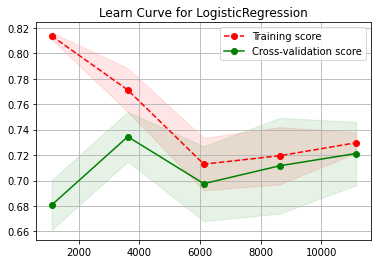

Function: evaluation_model Total Time Used: 5.433560132980347


In [203]:
logreg = m.train_logistic(train=True)
m.evaluation_model(logreg)

RandomForestClassifier: Score - 0.9613491900758663
Function: train_random_forest Total Time Used: 0.8340511322021484


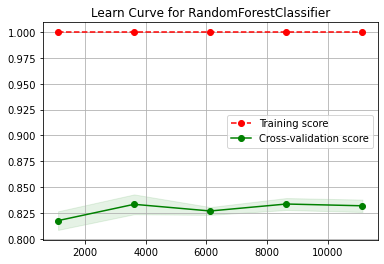

Function: evaluation_model Total Time Used: 23.28104519844055


In [156]:
rtd = m.train_random_forest(train=True)
m.evaluation_model(rtd)

DecisionTreeClassifier: Score - 0.9362312897272914
Function: train_decision_tree Total Time Used: 0.09401226043701172


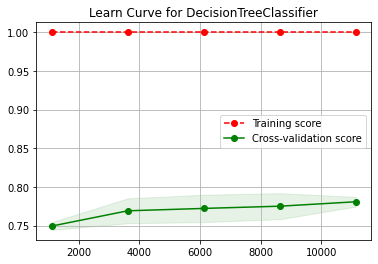

Function: evaluation_model Total Time Used: 3.207693099975586


In [157]:
td = m.train_decision_tree(train=True)
m.evaluation_model(td)

In [ ]:
svm = m.evaluation_model(m.train_svm(train=1))

Iteration 1, loss = 7.44651881
Validation score: 0.815789
Iteration 2, loss = 3.41450310
Validation score: 0.655502
Iteration 3, loss = 1.36221750
Validation score: 0.758373
Iteration 4, loss = 0.89988977
Validation score: 0.772727
Iteration 5, loss = 0.68404599
Validation score: 0.789474
Iteration 6, loss = 0.57208972
Validation score: 0.803828
Iteration 7, loss = 0.50840706
Validation score: 0.818182
Iteration 8, loss = 0.46128652
Validation score: 0.794258
Iteration 9, loss = 0.43149834
Validation score: 0.815789
Iteration 10, loss = 0.39363889
Validation score: 0.834928
Iteration 11, loss = 0.38529947
Validation score: 0.818182
Iteration 12, loss = 0.36714230
Validation score: 0.846890
Iteration 13, loss = 0.34831142
Validation score: 0.856459
Iteration 14, loss = 0.33696242
Validation score: 0.822967
Iteration 15, loss = 0.34142047
Validation score: 0.849282
Iteration 16, loss = 0.32206529
Validation score: 0.799043
Iteration 17, loss = 0.31825343
Validation score: 0.854067
Iterat

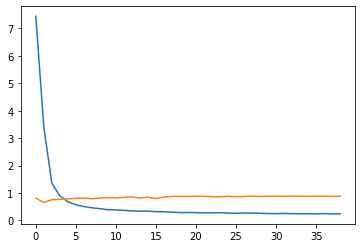

Function: train_mlp Total Time Used: 1.1766469478607178
Iteration 1, loss = 3.05932888
Validation score: 0.678571
Iteration 2, loss = 1.34979500
Validation score: 0.767857
Iteration 3, loss = 1.32644074
Validation score: 0.633929
Iteration 4, loss = 1.05567906
Validation score: 0.705357
Iteration 5, loss = 0.96822782
Validation score: 0.758929
Iteration 6, loss = 1.41513809
Validation score: 0.776786
Iteration 7, loss = 1.33320808
Validation score: 0.625000
Iteration 8, loss = 1.04387080
Validation score: 0.785714
Iteration 9, loss = 0.82053721
Validation score: 0.776786
Iteration 10, loss = 0.61206051
Validation score: 0.651786
Iteration 11, loss = 0.76473232
Validation score: 0.794643
Iteration 12, loss = 0.77163391
Validation score: 0.830357
Iteration 13, loss = 0.52044474
Validation score: 0.857143
Iteration 14, loss = 0.41597388
Validation score: 0.839286
Iteration 15, loss = 0.35683853
Validation score: 0.803571
Iteration 16, loss = 0.39660719
Validation score: 0.857143
Iteration

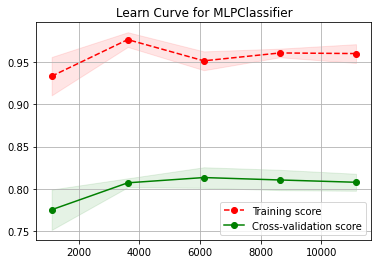

Function: evaluation_model Total Time Used: 52.450998067855835


In [159]:
mlp = m.train_mlp(train=1)
m.evaluation_model(mlp)

KNeighborsClassifier: Score - 0.9091654705761739


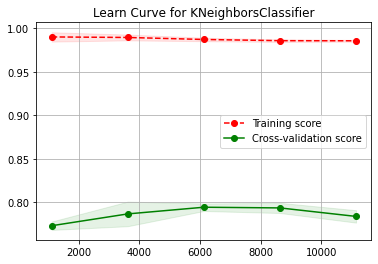

Function: evaluation_model Total Time Used: 35.92218804359436


In [161]:
knn = KNeighborsClassifier(n_neighbors=2)
m.train_model(knn)
m.evaluation_model(knn)

GaussianNB: Score - 0.42854213655936024


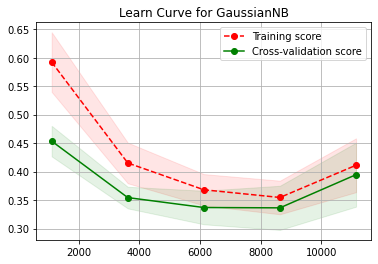

Function: evaluation_model Total Time Used: 2.178630828857422


In [162]:
gn = GaussianNB()
m.train_model(gn)
m.evaluation_model(gn)

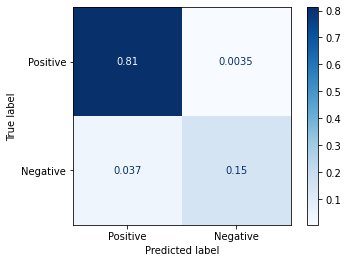

In [230]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, average_precision_score, precision_recall_curve


plot_confusion_matrix(rtd, m.X_test, m.y_test, display_labels=["Positive", "Negative"], cmap=plt.cm.Blues, normalize="all")

In [248]:
models = [rtd, knn, td, gn, mlp, logreg]
fpr = {}
tpr = {}
roc_auc = {}

for model in models:
  _class_name = model.__class__.__name__
  fpr[_class_name], tpr[_class_name], _ = metrics.roc_curve(m.y_test, model.predict_proba(m.X_test)[:,1])
  roc_auc[_class_name] = auc(fpr[_class_name], tpr[_class_name])



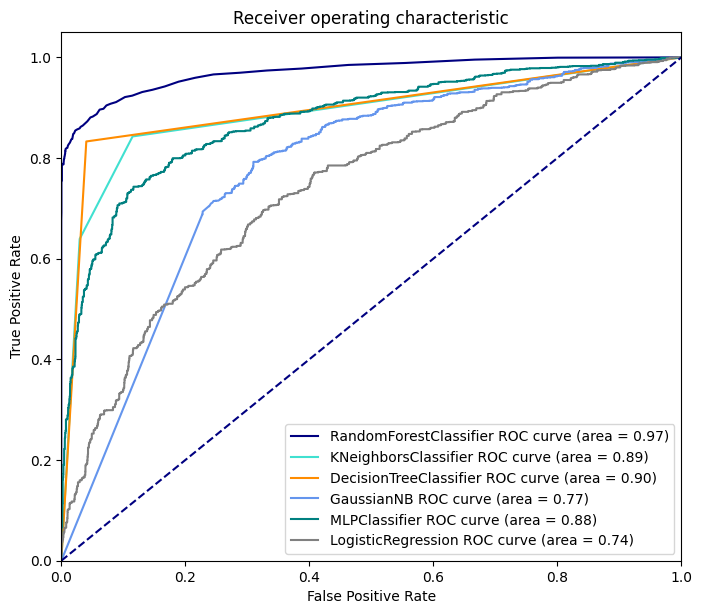

In [249]:
from itertools import cycle

plt.figure(figsize=(8,7), dpi=100)
lw = 1.5
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'gray'])

for model, color in zip(models, colors):
  _class_name = model.__class__.__name__
  plt.plot(fpr[_class_name], tpr[_class_name], color=color,
         lw=lw, label='%s ROC curve (area = %0.2f)' % (_class_name, roc_auc[_class_name]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

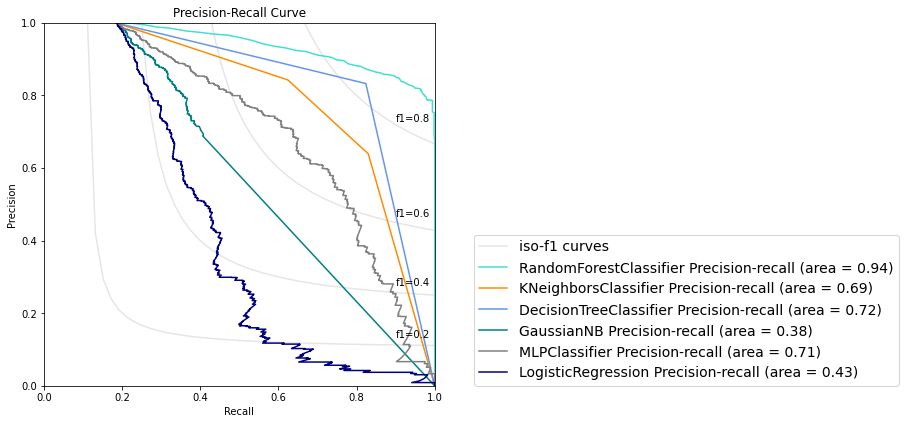

In [242]:


plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')


for model, color in zip(models, colors):
    y_score = model.predict_proba(m.X_test)[:,1]
    recall, precision, _ = precision_recall_curve(m.y_test, y_score)
    average_precision = average_precision_score(m.y_test, y_score)
    l, = plt.plot(recall, precision, color=color, lw=lw)
    lines.append(l)
    labels.append('{0} Precision-recall (area = {1:0.2f})'
                  ''.format(model.__class__.__name__, average_precision))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(lines, labels, loc=(1.1, 0), prop=dict(size=14))


plt.show()


['iso-f1 curves',
 'RandomForestClassifier Precision-recall (area = 0.94)',
 'KNeighborsClassifier Precision-recall (area = 0.69)',
 'DecisionTreeClassifier Precision-recall (area = 0.72)',
 'GaussianNB Precision-recall (area = 0.38)',
 'MLPClassifier Precision-recall (area = 0.71)',
 'LogisticRegression Precision-recall (area = 0.43)']

feature DLQ050_1.0 (0.165832)
feature SLQ050_1.0 (0.072919)
feature CBD070_RE (0.047086)
feature WHD050_RE (0.045950)
feature HUQ010_4 (0.038533)
feature CBD090_RE (0.037506)
feature ALQ130_RE (0.032943)
feature INDFMMPI_RE (0.031832)
feature HSD010_5.0 (0.031468)
feature CBD110_RE (0.028602)
feature SLD010H_RE (0.027466)
feature SXD031_RE (0.026629)
feature PAQ710_RE (0.025871)
feature WHD010_RE (0.021010)
feature WHD020_RE (0.018338)
feature SMD030_RE (0.017891)
feature DBD895_RE (0.016055)
feature SLQ050_2.0 (0.014987)
feature RHD190_RE (0.014960)
feature HSD010_2.0 (0.013714)


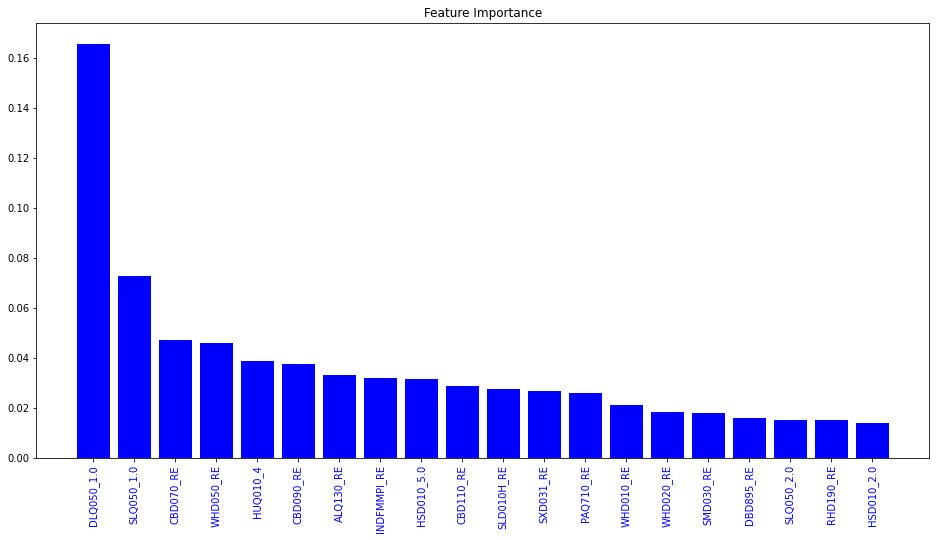

Function: feature_importance Total Time Used: 0.4507579803466797


In [204]:
m.feature_importance(td, showGraph=True)

In [20]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
from sklearn import metrics

def fold_test():
    folder = KFold(n_splits=20)
    td = MLPRegressor(hidden_layer_sizes=(6,2),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
        learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=5000, shuffle=True,
        random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
        early_stopping=True,beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    td = DecisionTreeRegressor()
    td.fit(m.X_train, m.y_train)

    for (trn_idx, val_idx) in folder.split(m.X, m.y):
        train, val = m.df.iloc[trn_idx], m.df.iloc[val_idx]
        train_X = train.iloc[:, 1:]
        train_y = train.iloc[:, 0]
        val_X = val.iloc[:, 1:]
        val_y = val.iloc[:, 0]
        #print(len(train_y))
        #td.fit(train_X, train_y)
        print(f"{td.__class__.__name__}: Score - {metrics.mean_absolute_error(val_y,td.predict(val_X))}")


fold_test()


DecisionTreeRegressor: Score - 0.6700143472022956
DecisionTreeRegressor: Score - 0.9664242484209833
DecisionTreeRegressor: Score - 1.0653539801118095
DecisionTreeRegressor: Score - 1.230280842362176
DecisionTreeRegressor: Score - 1.0011378815613714
DecisionTreeRegressor: Score - 1.4122594369959929
DecisionTreeRegressor: Score - 1.1367436798100234
DecisionTreeRegressor: Score - 0.8569567440096308
DecisionTreeRegressor: Score - 0.9170665743168588
DecisionTreeRegressor: Score - 1.009746202938703
DecisionTreeRegressor: Score - 1.095417140783984
DecisionTreeRegressor: Score - 1.0210095812925675
DecisionTreeRegressor: Score - 1.0080970992265703
DecisionTreeRegressor: Score - 1.4797572519335742
DecisionTreeRegressor: Score - 1.1083201215484213
DecisionTreeRegressor: Score - 1.0119236358832078
DecisionTreeRegressor: Score - 1.1000627559783327
DecisionTreeRegressor: Score - 1.1938168846611177
DecisionTreeRegressor: Score - 1.2666633637204388
DecisionTreeRegressor: Score - 1.3811765094464261


In [152]:
import imp
imp.reload(model)
imp.reload(health_data)
from model import Model

In [61]:
newtestdf = df[["SEQN", "SUM", "ACD011A"]]
newtestdf.cont

AttributeError: 'DataFrame' object has no attribute 'cont'